# L'énoncé

- Maximum avant le 19 janvier 2025 à 20h.
- Le nombre de point bonus maximal atteignable est de 3 :
  - un point pour la qualité de l'argumentation
  - un point pour la rigueur méthodologique
  - un point pour la performance si la RMSE finale obtenu est inférieure à 1.5 pour un dataset de test composée des 20% date les plus récentes.

### Description du Dataset

Le dataset représente les données de marché pour l'indice VKOSPI, qui est l'équivalent coréen de l'indice de volatilité implicite VIX aux États-Unis. Chaque ligne du dataset correspond à un jour de trading, excluant les week-ends et les jours fériés. Les colonnes du dataset fournissent diverses informations sur les transactions et les positions des options et des futures sur l'indice KOSPI200, qui est l'actif sous-jacent du VKOSPI.

### Description des Colonnes

- Date : La date du jour de trading.
- VKOSPI : La valeur de l'indice de volatilité implicite VKOSPI pour ce jour.
- KOSPI200 : La valeur de l'indice KOSPI200 pour ce jour.
- Open_interest : Le nombre total de contrats d'options ouverts (non réglés) pour ce jour.
- For_KOSPI_Netbuying_Amount : Le montant net acheté par les étrangers pour l'indice KOSPI200, calculé comme (Prix) \* (Quantité).
- For_Future_Netbuying_Quantity : La quantité nette achetée par les étrangers pour les futures de KOSPI200.
- For_Call_Netbuying_Quantity : La quantité nette achetée par les étrangers pour les options d'achat (call) de KOSPI200.
- For_Put_Netbuying_Quantity : La quantité nette achetée par les étrangers pour les options de vente (put) de KOSPI200.
- Indiv_Future_Netbuying_Quantity : La quantité nette achetée par les individus pour les futures de KOSPI200.
- Indiv_Call_Netbuying_Quantity : La quantité nette achetée par les individus pour les options d'achat (call) de KOSPI200.
- Indiv_Put_Netbuying_Quantity : La quantité nette achetée par les individus pour les options de vente (put) de KOSPI200.
- PCRatio : Le ratio Put-Call, qui est le rapport entre le volume des options de vente (put) et le volume des options d'achat (call).
- Day_till_expiration : Le nombre de jours restants jusqu'à la date d'expiration des options.

### Quelques explications de notions financières:

Le KOSPI200 est un indice boursier composé des 200 plus grandes entreprises cotées en Corée du Sud. Il est souvent considéré comme un indicateur de la performance du marché boursier coréen. Un indice similaire au S&P500 pour les États-Unis, l’Euro STOXX 50 l’Europe ou le Nikkei 225 pour le Japon.

La volatilité implicite est une mesure de la volatilité future attendue d'un actif sous-jacent, dérivée des prix des options. Le VKOSPI est l'indice de volatilité implicite pour le marché coréen, comparable au VIX pour le marché américain, VSTOXX pour le marché européen ou VNKY pour le Japon.

L'open interest représente le nombre total de contrats d'options ouverts (non réglés) à une date donnée. C'est une mesure de l'activité de trading et de l'intérêt des investisseurs pour les options.

Le net buying amount ou quantity représente la différence entre les achats et les ventes effectués par un groupe spécifique (étrangers ou individus) pour un actif donné (KOSPI200, futures, options d'achat, options de vente). Un net buying positif indique que les achats dépassent les ventes.

Le ratio Put-Call est le rapport entre le volume des options de vente (put) et le volume des options d'achat (call). Il est utilisé comme indicateur de sentiment de marché. Un ratio élevé peut indiquer une prudence ou une anticipation de baisse des prix.

Une option d'achat (call) donne à son détenteur le droit, mais non l'obligation, d'acheter un actif sous-jacent à un prix prédéterminé (prix d'exercice) avant une date d'expiration donnée.

Une option de vente (put) donne à son détenteur le droit, mais non l'obligation, de vendre un actif sous-jacent à un prix prédéterminé (prix d'exercice) avant une date d'expiration donnée.

Un contrat à terme (future) est un accord pour acheter ou vendre un actif sous-jacent à un prix prédéterminé à une date future spécifiée.

Day_till_expiration p/s: Dans le marché des options KOSPI200, les options expirent généralement une fois par mois, la date d'expiration étant fixée au deuxième jeudi de chaque mois. Par conséquent, dans les données, la variable Day_till_expiration représente le nombre de jours restants avant la prochaine date d'expiration.
Lorsque les options arrivent à expiration, tous les contrats ouverts non réglés sont automatiquement liquidés ou livrés. Ensuite, un nouveau contrat d'options est généré, avec une date d'expiration fixée au deuxième jeudi du mois suivant

### Objectif

Prédire, en expliquant rigoureusement et clairement la démarche, la valeur du VKOSPI. La métrique de référence sera la RSME, mais à des fins d'analyse d'autres métrique peuvent être discutée. Aucun algorithmes autres que ceux vus en cours et décrit dans le poly ne seront acceptés.


# Chargement des données


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("options_KR.csv", parse_dates=["Date"], index_col="Date")

df["For_KOSPI_Netbuying_Amount"] = df["For_KOSPI_Netbuying_Amount"].apply(
    lambda x: int(float(x))
)
# tranformer les valeurs de la forme "-1.090000e+11" en entier

predictors = df.columns[1:].tolist()
df.head()

,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week
Date,,,,,,,,,,,,,
2009-06-02,33.45,180.90,4377777,4.940000e+11,-4953,-24646,6581,1228,-466,31336,0.94,7,Tue
2009-06-03,32.66,180.47,4562690,-8.997074e+10,47,-57128,46851,399,127709,-22259,0.93,6,Wed
2009-06-04,32.56,180.31,4827524,-1.090000e+11,-7666,-2000,48883,5744,262558,10367,0.87,5,Thu
2009-06-05,32.95,175.75,5022921,9.842024e+10,969,64792,27196,-1688,79789,113935,0.89,4,Fri
2009-06-08,30.41,177.77,5293996,4.329179e+10,5797,10995,23123,-5534,97154,146244,0.81,3,Mon


# Exploration de donnée

En explorant les données, nous pouvons mieux comprendre la distribution des variables, les relations entre eux, les valeurs manquantes, les incohérences dans le format des données ou les valeurs aberrantes


In [65]:
def explore_column(df, column, target_column, alpha=0.8, figsize=(15, 8)):
    def plot_histogram():
        plt.hist(df[column])
        plt.xlabel(column.capitalize())
        plt.title("Distribution de la variable %s" % column)

    def plot_price(alpha=alpha):
        plt.scatter(x=df[column], y=df[target_column], alpha=alpha)
        plt.xlabel(column.capitalize())
        plt.ylabel(target_column.capitalize())
        plt.title("%s in function of %s" % (target_column.capitalize(), column))

    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plot_histogram()
    plt.subplot(1, 2, 2)
    plot_price()

    plt.suptitle("Variable %s" % column)
    plt.show()


def make_violin_plot(column, figsize=(15, 8)):
    plt.figure(figsize=figsize)
    sns.violinplot(x=column, y="VKOSPI", data=df, inner=None)
    plt.xlabel(column)
    plt.ylabel("VKOSPI")
    plt.title("Distribution of VKOSPI in function of %s" % column.capitalize())
    plt.show()

In [67]:
print(df.dtypes)
df.describe()

VKOSPI                             float64
KOSPI200                           float64
Open_interest                        int64
For_KOSPI_Netbuying_Amount         float64
For_Future_Netbuying_Quantity        int64
For_Call_Netbuying_Quantity          int64
For_Put_Netbuying_Quantity           int64
Indiv_Future_Netbuying_Quantity      int64
Indiv_Call_Netbuying_Quantity        int64
Indiv_Put_Netbuying_Quantity         int64
PCRatio                            float64
Day_till_expiration                  int64
Day_of_a_week                       object
dtype: object


,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration
count,2580.000000,2580.000000,2.580000e+03,2.580000e+03,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,16.744302,259.246508,2.303927e+06,2.889290e+10,10.226744,2727.117829,14117.202326,4.820930,16000.406589,6695.945736,0.954837,9.982946
std,5.327865,29.034358,1.578398e+06,2.560887e+11,3953.221118,19549.308255,25202.453076,2126.388898,53037.030365,59832.131764,0.170583,6.293434
min,9.720000,174.320000,2.242960e+05,-1.310000e+12,-20745.000000,-174455.000000,-183760.000000,-11879.000000,-179929.000000,-151533.000000,0.280000,0.000000
25%,13.087500,243.750000,1.013118e+06,-1.130000e+11,-2164.750000,-2863.250000,1836.000000,-1209.500000,-2574.000000,-13051.250000,0.850000,5.000000
50%,15.305000,257.310000,1.879194e+06,2.221070e+10,31.000000,1780.000000,9257.500000,-13.000000,4984.000000,-2065.500000,0.950000,10.000000
75%,18.772500,271.570000,3.236718e+06,1.670000e+11,2221.500000,7435.250000,23097.500000,1213.500000,17872.250000,9729.000000,1.050000,15.000000
max,50.110000,338.830000,9.134484e+06,1.720000e+12,20265.000000,152445.000000,228939.000000,10325.000000,908263.000000,919563.000000,1.790000,26.000000


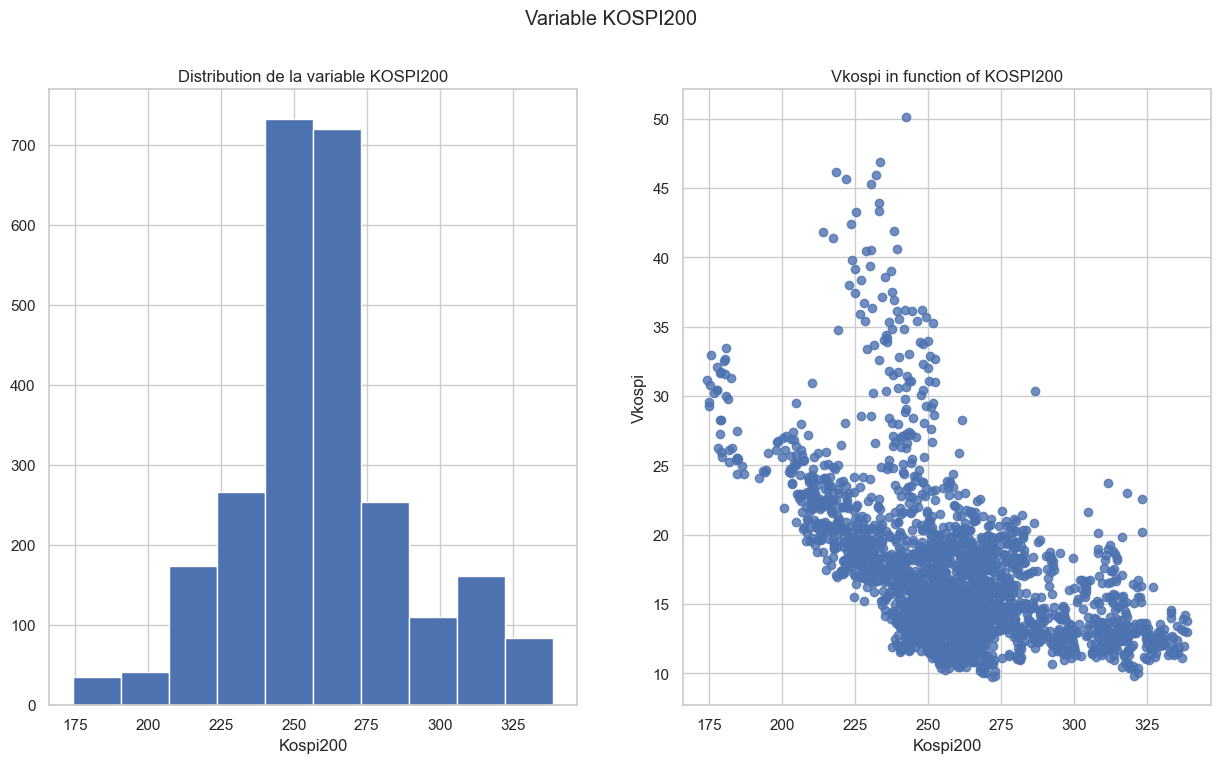

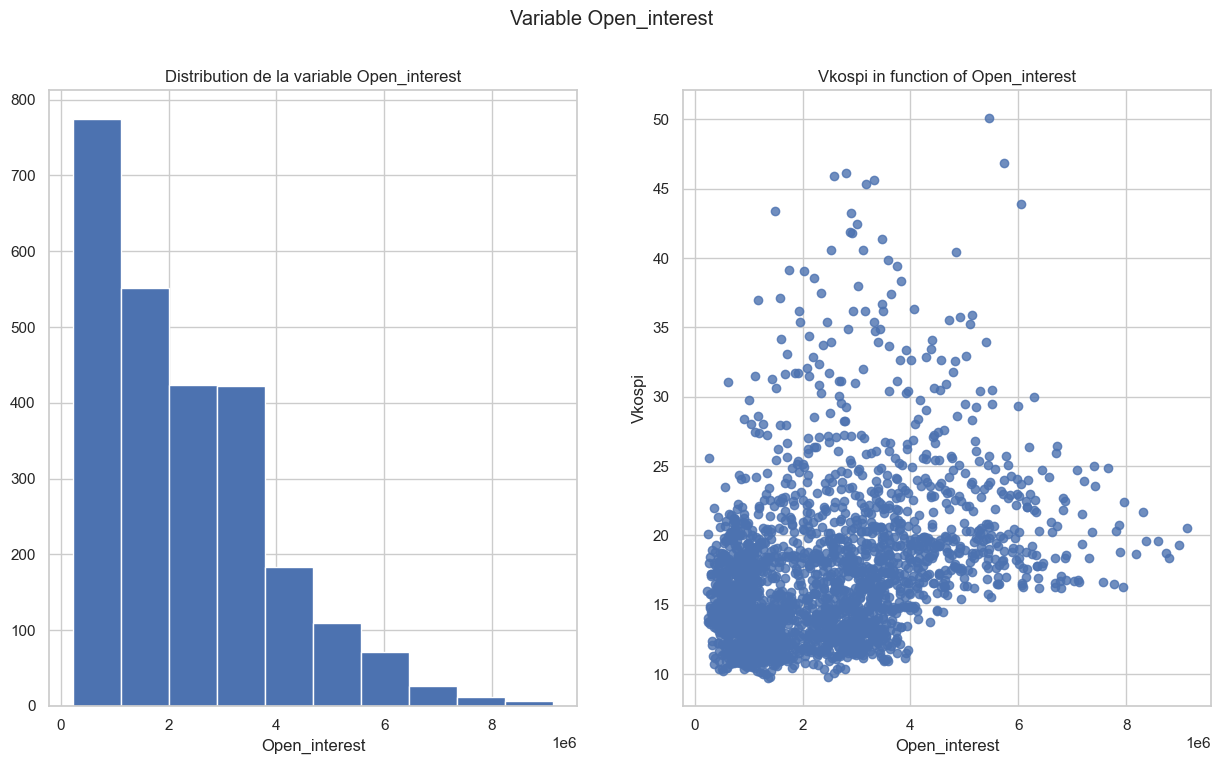

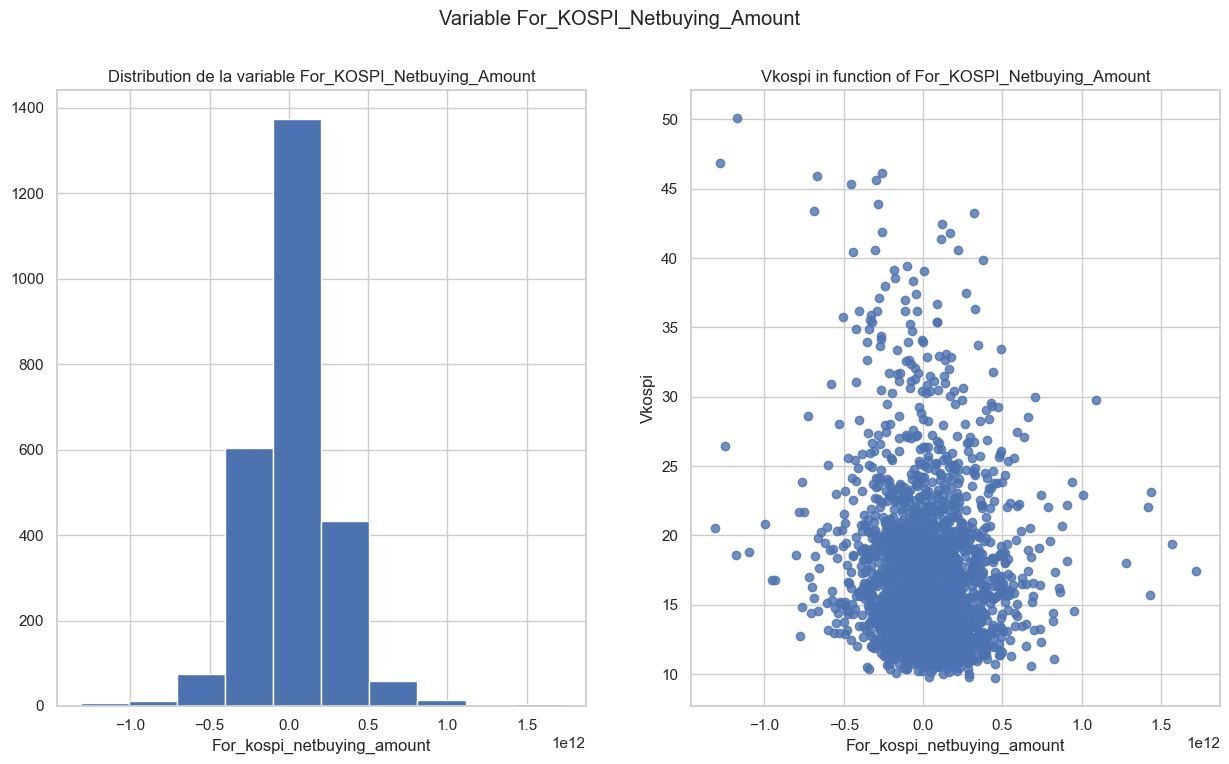

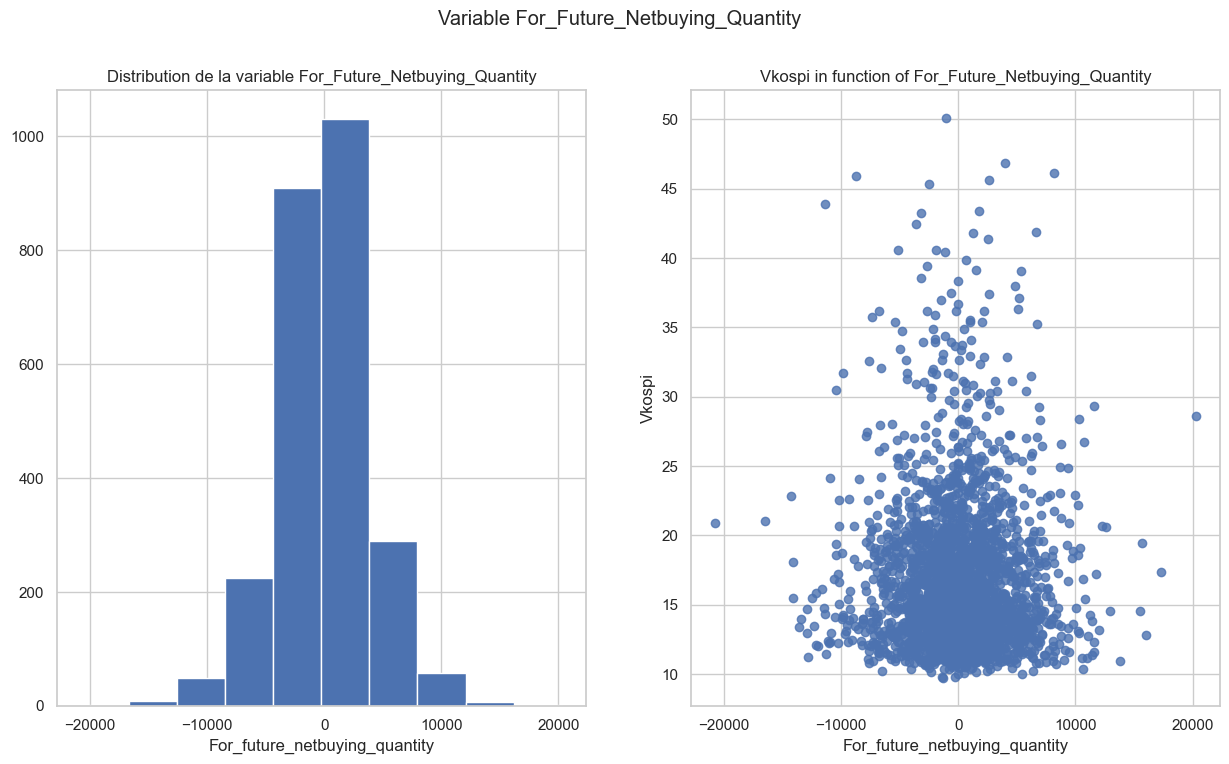

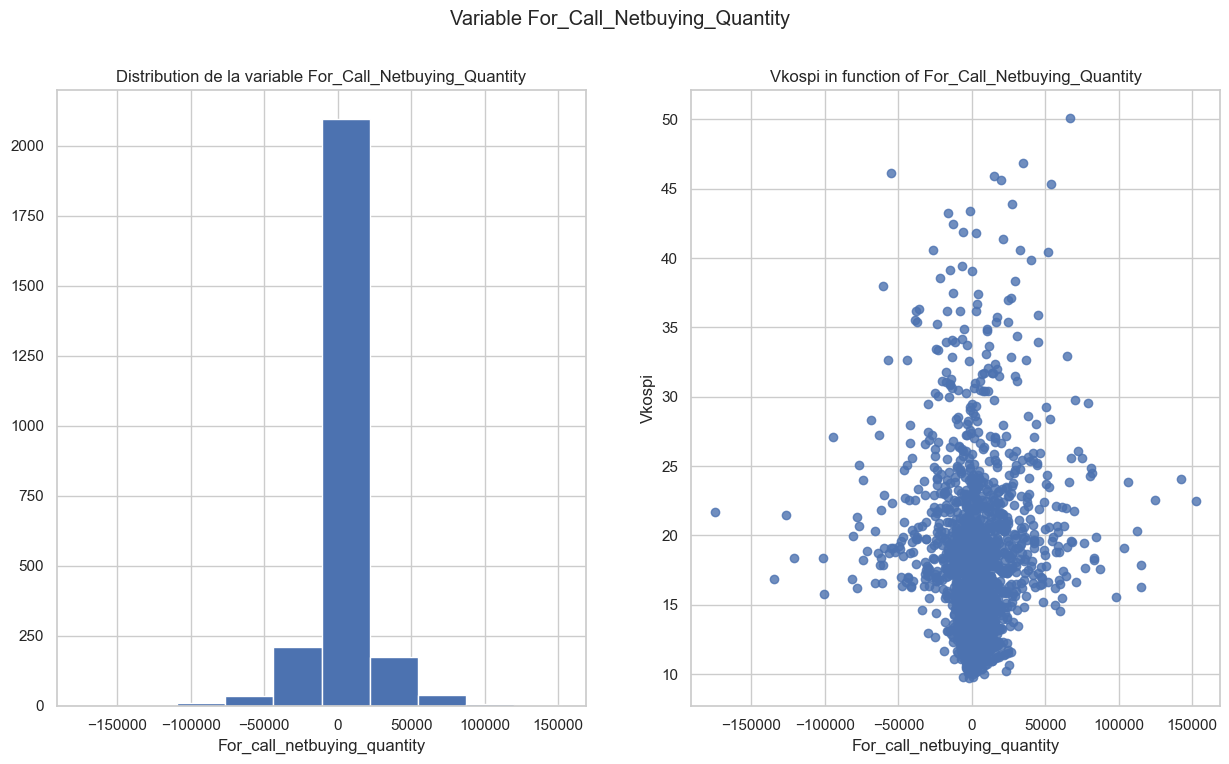

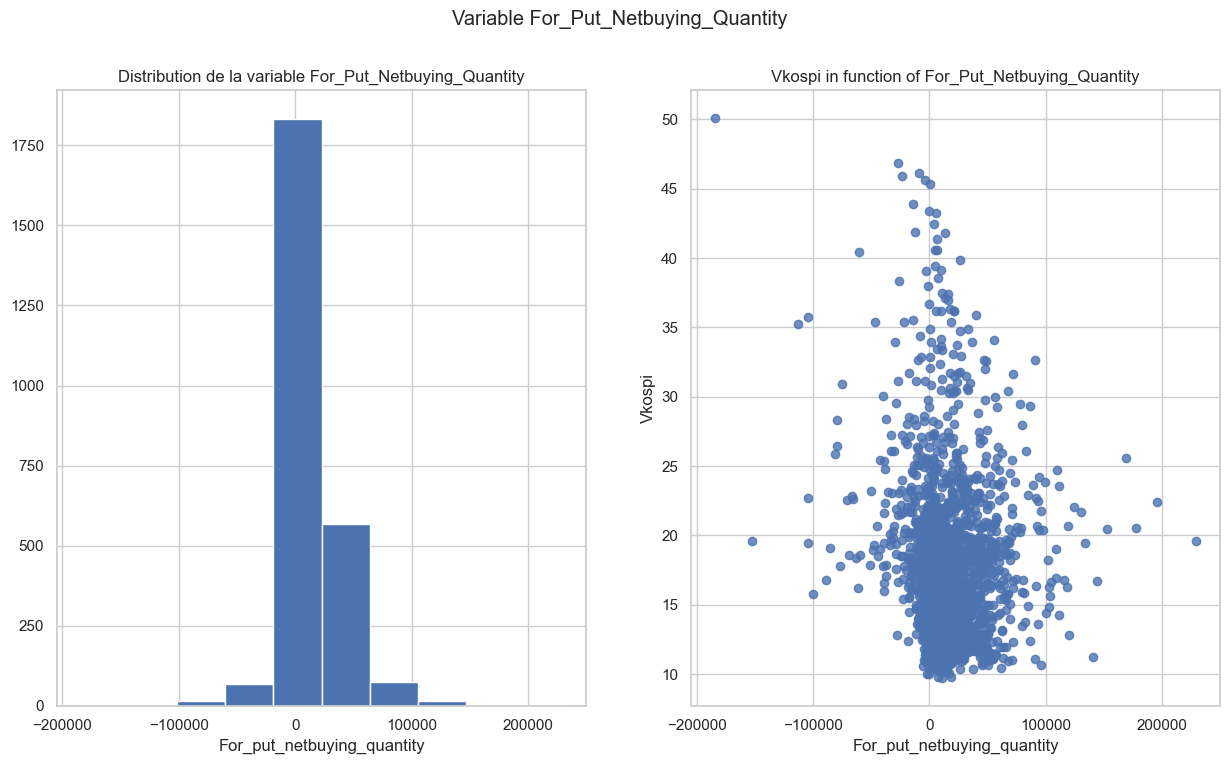

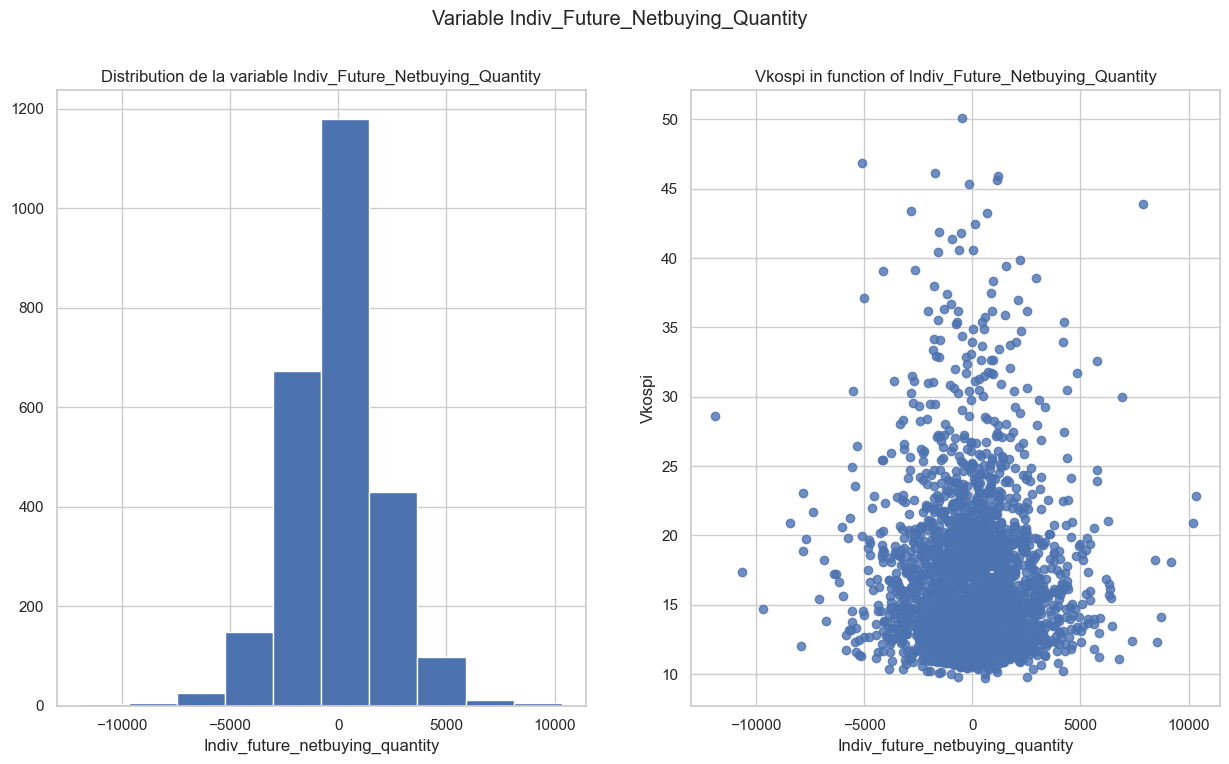

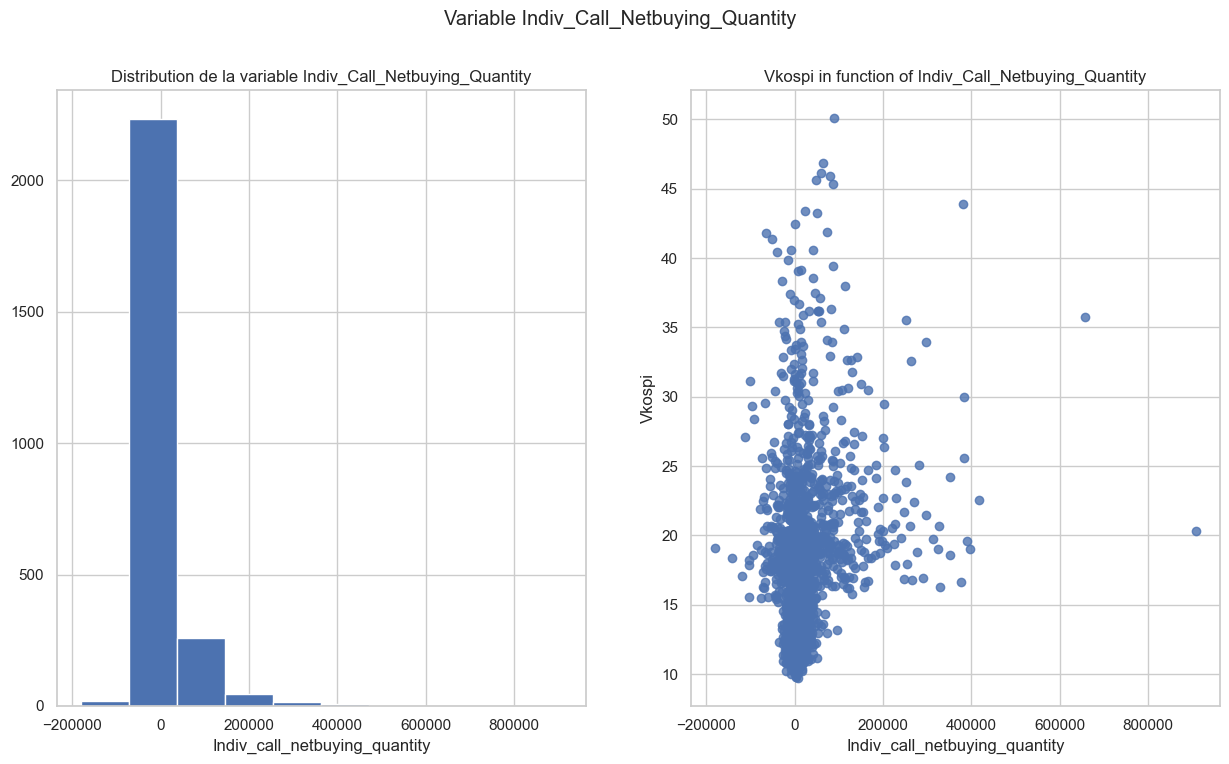

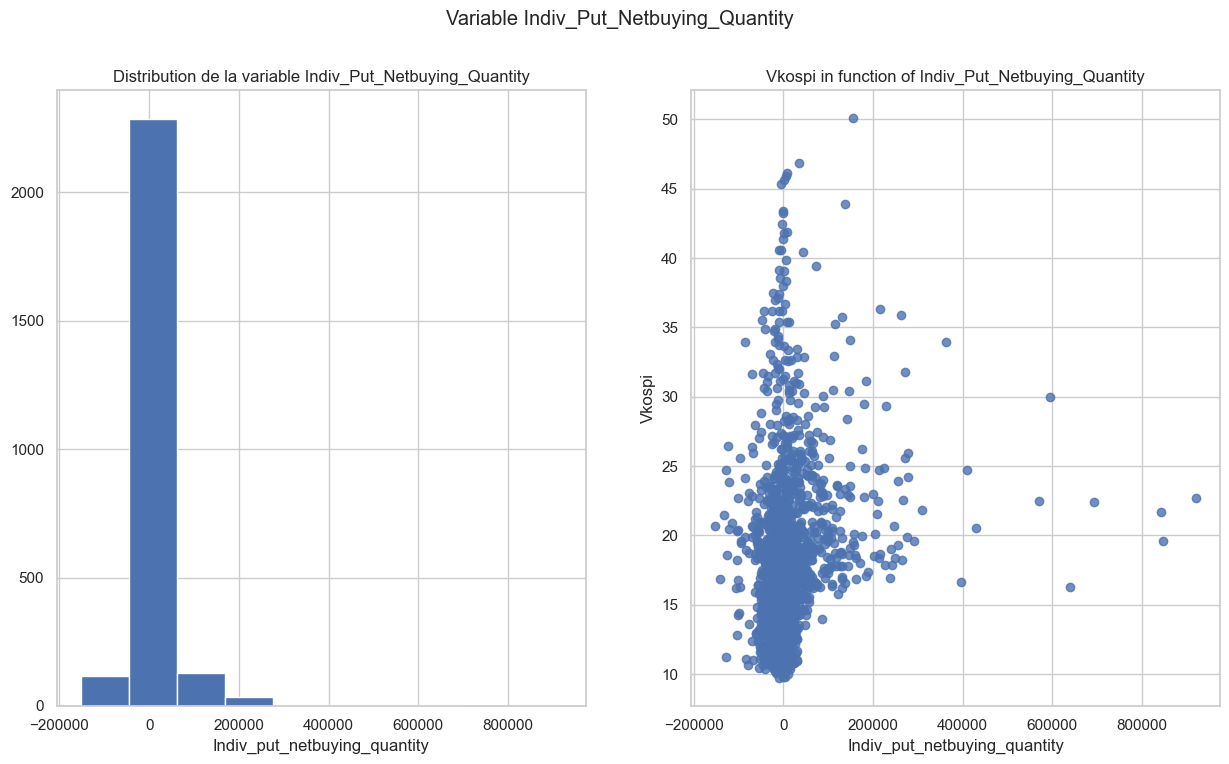

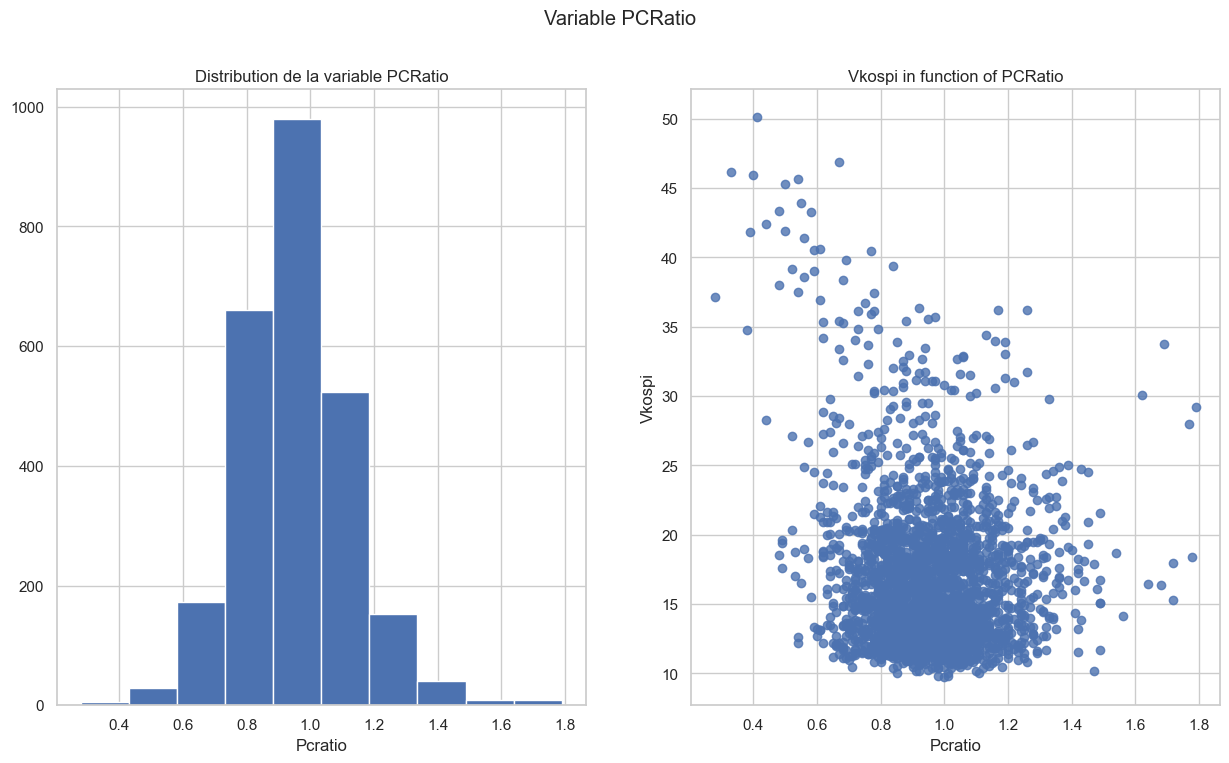

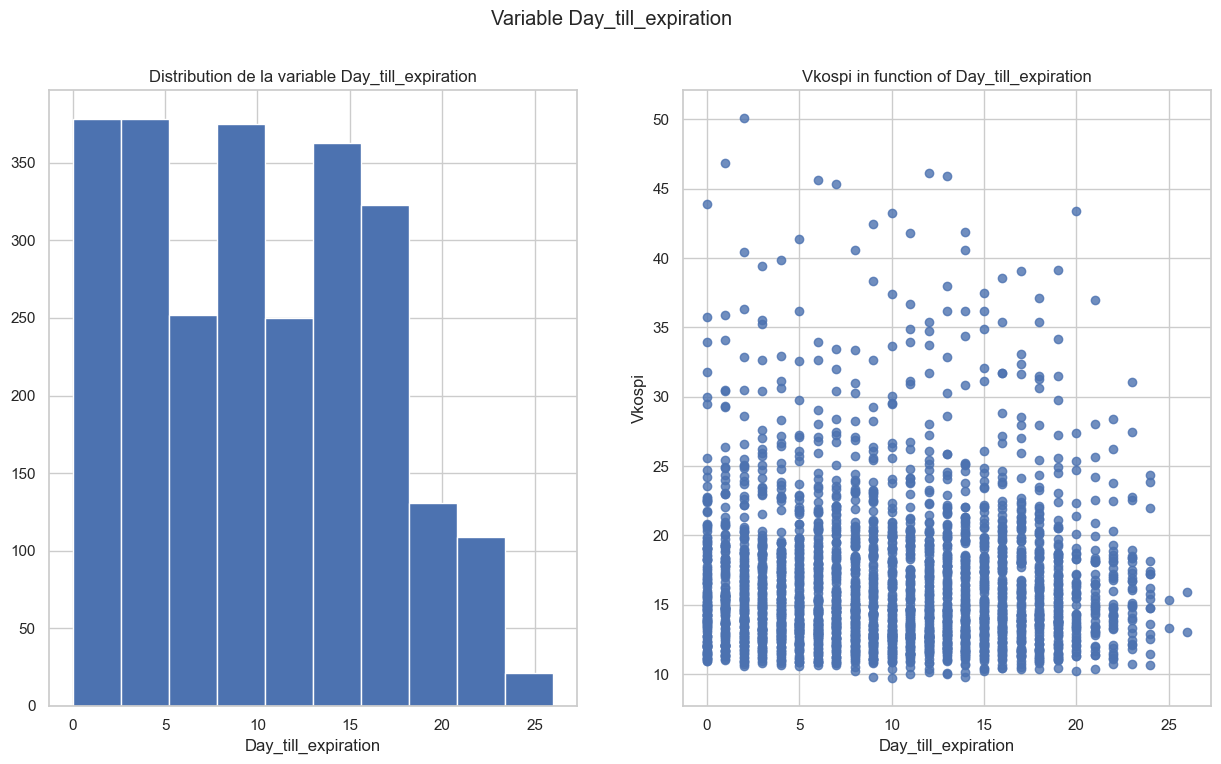

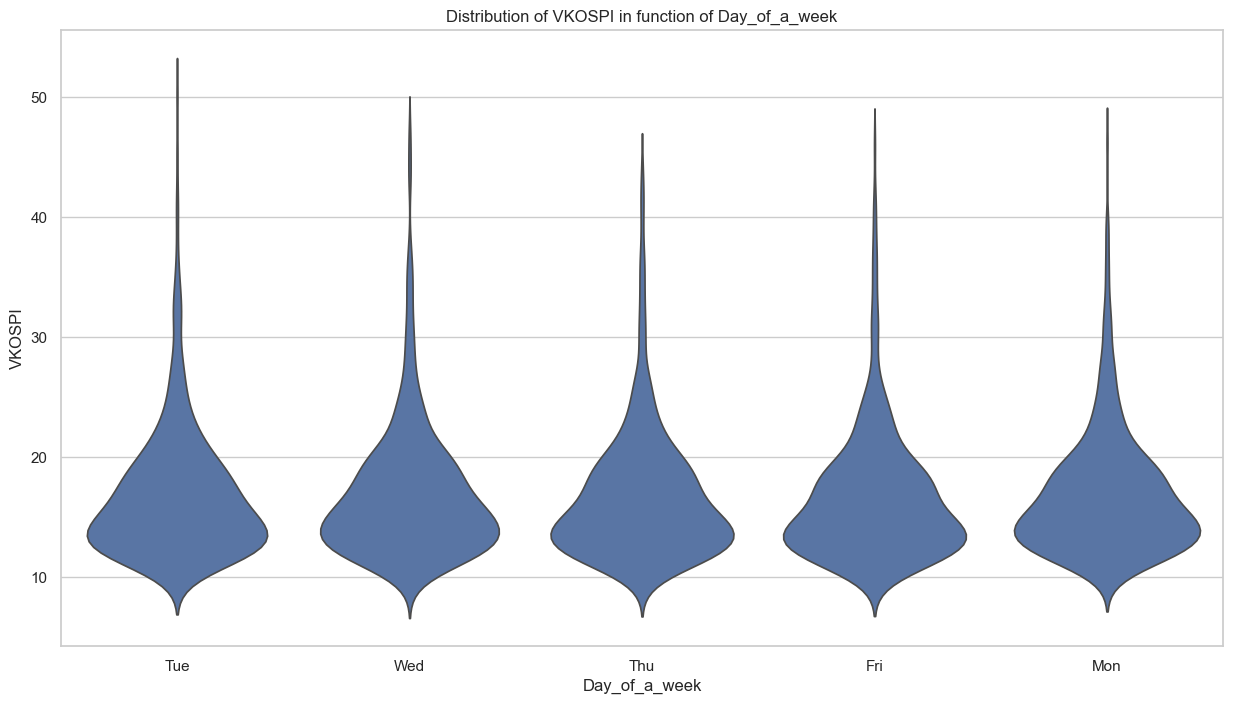

In [ ]:
for column in df.columns:
    if column != "VKOSPI" and column != "Day_of_a_week":
        explore_column(df, column, "VKOSPI")
make_violin_plot("Day_of_a_week")

À première vue :

- La variable "Day_of_week" est une variable catégorique.
- Les deux variables "Day_till_expiration" et "Day_of_week" ne semblent pas jouer un rôle significatif dans l'explication de la variable cible VKOSPI. - Le nuage de points ne montre aucune tendance claire ou relation forte entre Day_till_expiration et VKOSPI. - Les points sont uniformément répartis pour différentes valeurs de Day_till_expiration, ce qui suggère une faible capacité explicative de cette variable.
  => Risque d'introduction de bruit.
- Deux valeurs aberrantes sont identifiées pour la variable "Indiv_Call_Net_Buying_Quantity", avec des valeurs supérieures à 600 000.


# Traitement de données basique

Pour l'instant, nous procédons à un traitement de données très basique. Des nettoyages plus avancés seront effectués par la suite.


### One-hot encoding

On transforme la variable catégorielle "Day_of_a_week" en variables numériques


In [68]:
df = pd.get_dummies(df, columns=["Day_of_a_week"])

predictors = df.columns[1:].tolist()
df.head()

,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week_Fri,Day_of_a_week_Mon,Day_of_a_week_Thu,Day_of_a_week_Tue,Day_of_a_week_Wed
Date,,,,,,,,,,,,,,,,,
2009-06-02,33.45,180.90,4377777,4.940000e+11,-4953,-24646,6581,1228,-466,31336,0.94,7,False,False,False,True,False
2009-06-03,32.66,180.47,4562690,-8.997074e+10,47,-57128,46851,399,127709,-22259,0.93,6,False,False,False,False,True
2009-06-04,32.56,180.31,4827524,-1.090000e+11,-7666,-2000,48883,5744,262558,10367,0.87,5,False,False,True,False,False
2009-06-05,32.95,175.75,5022921,9.842024e+10,969,64792,27196,-1688,79789,113935,0.89,4,True,False,False,False,False
2009-06-08,30.41,177.77,5293996,4.329179e+10,5797,10995,23123,-5534,97154,146244,0.81,3,False,True,False,False,False


### Matrice de corrélation entre les variables


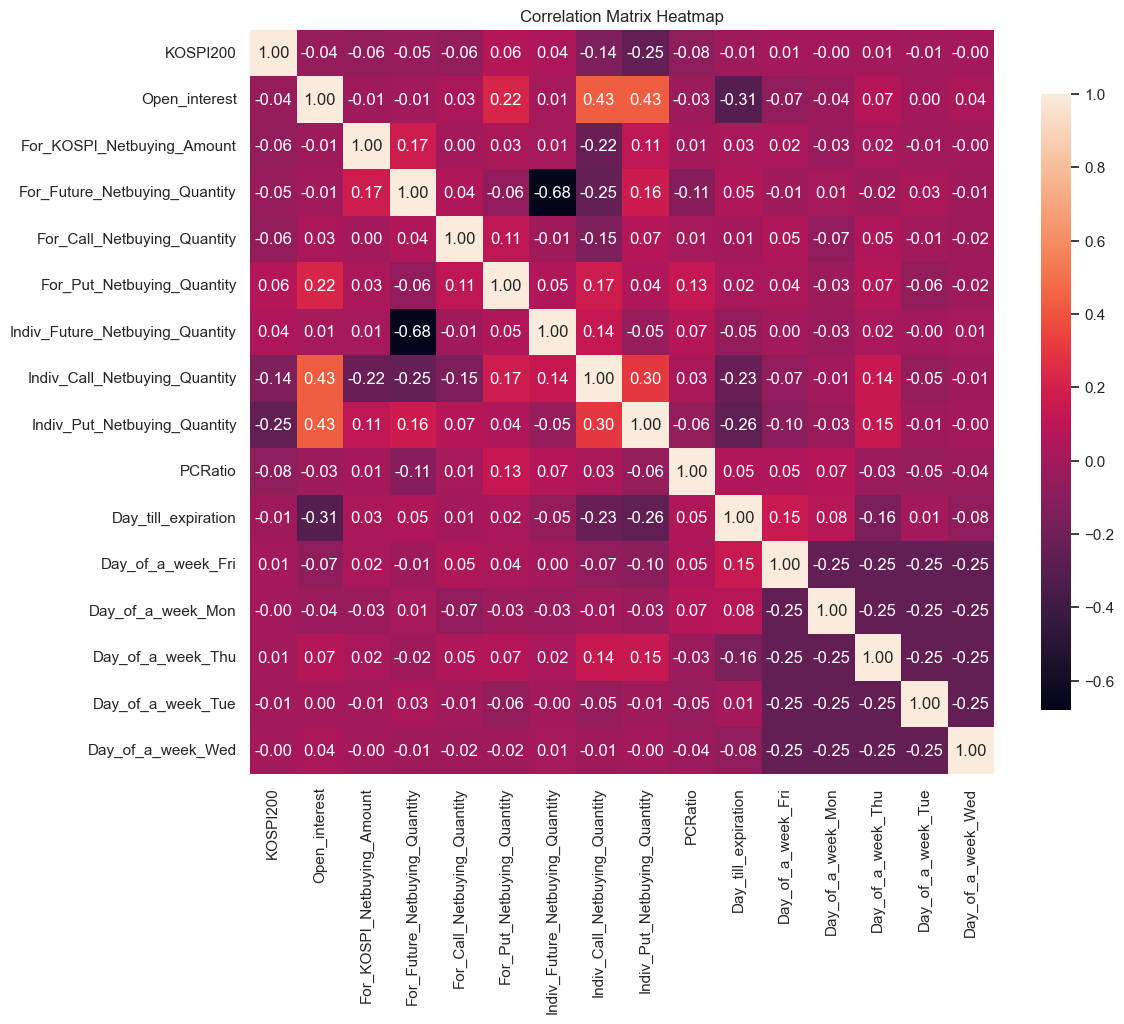

Highly correlated pairs (|correlation| > 0.9):
Series([], dtype: float64)


In [ ]:
def display_correlation_matrix():
    correlation_matrix = df[predictors].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        correlation_matrix, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.8}
    )
    plt.title("Correlation Matrix Heatmap")
    plt.show()

    high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
    high_corr_pairs = high_corr_pairs[
        (high_corr_pairs.abs() > 0.6) & (high_corr_pairs < 1.0)
    ]

    print("Highly correlated pairs (|correlation| > 0.6):")
    print(high_corr_pairs)


display_correlation_matrix()

En générale, les variables présentent de faibles corrélations entre elles (Sauf "Indiv_Future_Netbuying_Quantity" et "For_Future_Netbuying_Quantity" affichent un coefficient de corrélation de -0,68, ce qui est relativement élevé comparé aux autres corrélations, mais cet écart ne poserait pas de problème majeur)


### Élimination des valeurs aberrantes

Nous éliminons les deux observations présentant des valeurs aberrantes dans la colonne "Indiv_Call_Net_Buying_Quantity"


In [69]:
print("Taille avant : %d" % df.shape[0])
df = df.loc[df["Indiv_Call_Netbuying_Quantity"] < 600000,]
print("Taille après : %d" % df.shape[0])

Taille avant : 2580
Taille après : 2578


# Entraînement et évaluation des modèles avec un traitement de donnée basique

Pour un dataset daté, il n'est pas approprié de séparer les données d'entraînement et de test de manière aléatoire. Les données d'entraînement doivent toujours être plus anciennes que celles de test. Par conséquent, nous développons une fonction de validation croisée spécifique pour ce type de dataset, en nous appuyant sur la fonction "TimeSeriesSplit" de la librairie "sklearn".


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet

RMSE = lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))


def cross_validation_time_series(model, X, y, metric=mean_squared_error, n_splits=10):
    scores = []
    tscv = TimeSeriesSplit(n_splits=n_splits)

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        score = metric(y_test, y_pred)
        scores.append(score)

    return scores

Dans le cadre de ce projet, nous allons tester différentes stratégies en utilisant plusieurs modèles supervisés étudiés au cours et comparer leurs performances. Les modèles sélectionnés sont les suivants :

- Random Forest
- LGBM
- Régression linéaire simple
- Lasso
- Ridge
- Elastic Net

Pour les modèles nécessitant une sélection d'hyperparamètres, nous avons effectué des tests afin de déterminer les paramètres optimaux pour chaque modèle. Ces testes là sont dans les fichiers "Boosting_best_param.ipynb", "Random_forest_best_param.ipynb" et "Regression_linear_best_param.ipynb".

Pour évaluer la performance des modèles, nous avons utilisé la métrique d'erreur RMSE


In [70]:
list_models = [
    "RandomForest",
    "LGBM",
    "LinearRegression",
    "Lasso",
]


def train_predict(X, y, name, cv=5, model_name="RandomForest"):
    model = RandomForestRegressor()
    if model_name == "RandomForest":
        model = RandomForestRegressor(
            min_samples_leaf=1, n_estimators=500, random_state=42
        )
    elif model_name == "LGBM":
        model = LGBMRegressor(
            n_estimators=500, learning_rate=0.0001, random_state=42, verbose=-1
        )
    elif model_name == "LinearRegression":
        model = LinearRegression()
    elif model_name == "Lasso":
        model = Lasso(alpha=22.56)

    scores_RMSE = cross_validation_time_series(model, X, y, metric=RMSE, n_splits=cv)
    mean_scores_RMSE = np.mean(scores_RMSE)
    std_scores_RMSE = np.std(scores_RMSE)
    print(
        "%s - %s : %0.4f (+/- %0.4f)"
        % (
            model_name,
            name,
            mean_scores_RMSE,
            std_scores_RMSE,
        )
    )

In [ ]:
for model_name in list_models:
    train_predict(
        df[predictors], df["VKOSPI"], "Traitement basique", model_name=model_name
    )

RandomForest - Basique nettoyage de données : 5.6608 (+/- 2.0895)
LGBM - Basique nettoyage de données : 5.8888 (+/- 1.6295)
LinearRegression - Basique nettoyage de données : 5.0933 (+/- 2.3319)
Lasso - Basique nettoyage de données : 5.1161 (+/- 2.1611)
Ridge - Basique nettoyage de données : 5.0826 (+/- 2.3196)
ElasticNet - Basique nettoyage de données : 5.1194 (+/- 2.1567)


c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.39102e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.07323e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.68834e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.99861e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True

# Entraînement et évaluation des modèles avec un traitement de donnée avancé


### Suppression des variables "Day_till_expiration" et "Day_of_week"

Comme observé précédemment, les caractéristiques "Day_till_expiration" et "Day_of_week" montrent une faible capacité explicative vis-à-vis de la variable cible VKOSPI.

Si ces variables étaient conservées, elles pourraient augmenter la complexité du modèle, voire introduire du bruit, ce qui pourrait nuire à sa capacité de généralisation.

En conséquence, nous avons décidé de supprimer ces deux colonnes.


In [35]:
predictors.remove("Day_till_expiration")
predictors.remove("Day_of_a_week_Fri")
predictors.remove("Day_of_a_week_Mon")
predictors.remove("Day_of_a_week_Thu")
predictors.remove("Day_of_a_week_Tue")
predictors.remove("Day_of_a_week_Wed")

In [ ]:
for model_name in list_models:
    train_predict(
        df[predictors], df["VKOSPI"], "Suppression des variables", model_name=model_name
    )

RandomForest - Suppression des variables : 5.6246 (+/- 2.0762)
LGBM - Suppression des variables : 5.8748 (+/- 1.6306)
LinearRegression - Suppression des variables : 5.1268 (+/- 2.3057)
Lasso - Suppression des variables : 5.0871 (+/- 2.1297)
Ridge - Suppression des variables : 5.1096 (+/- 2.2847)
ElasticNet - Suppression des variables : 5.0905 (+/- 2.1254)


c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.5055e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.33577e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.03327e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.28236e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True)

On voit que les résultats sont légèrement amélioré


### Mettre moin du poids pour les données pendant la période de crise (2011 - 2012)


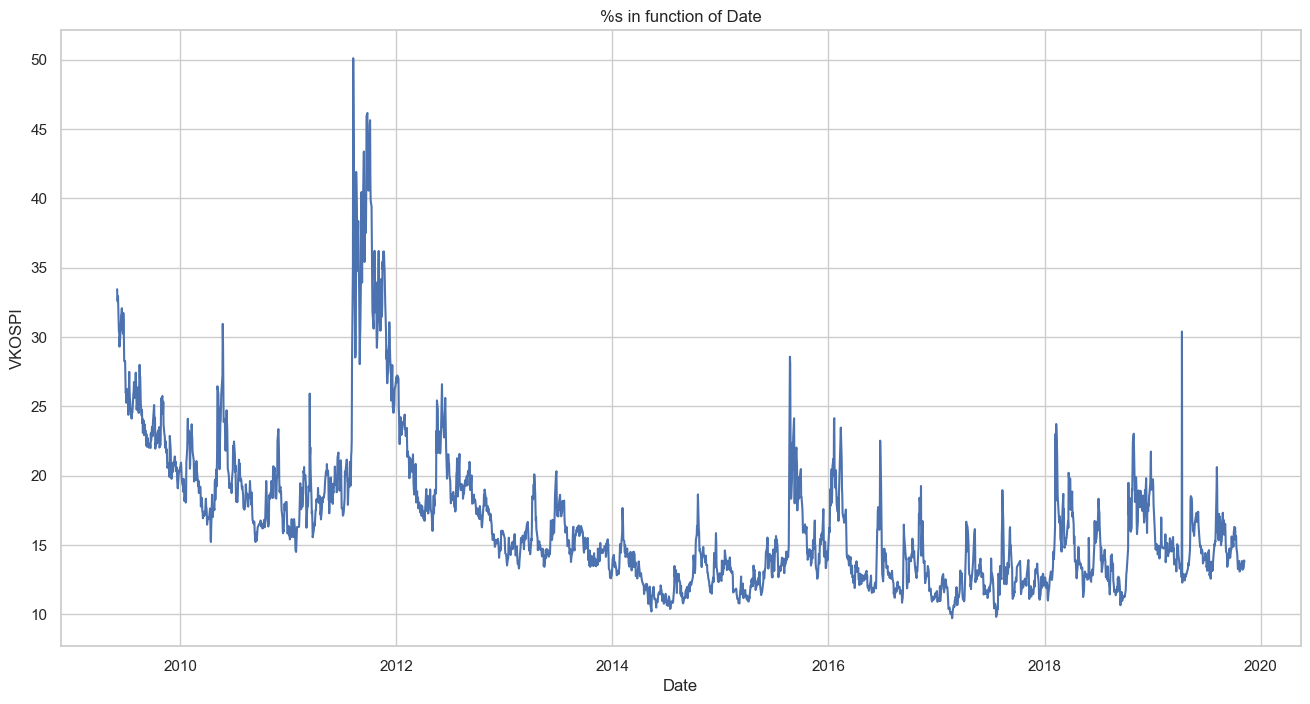

In [71]:
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters


def plot_time_series(df, dateFormatter):
    register_matplotlib_converters()
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.plot(df.index, df["VKOSPI"])
    ax.set(xlabel="Date", ylabel="VKOSPI", title="%s in function of Date")
    date_form = DateFormatter(dateFormatter)
    ax.xaxis.set_major_formatter(date_form)
    plt.show()


plot_time_series(df, "%Y")

Suite à la graphique, nous pouvons observer que la valeur de VKOSPI pendant la période de 2011-2012 est considérablement plus élevée, tandis que les autres périodes restent relativement stables. Bien que nous ne puissions pas en être certains, il est raisonnable de supposer que cette hausse est liée à la crise de la dette souveraine européenne de 2011-2012.

Si ces données étaient prises en compte avec le même poids que celles des autres périodes, cela risquerait de biaiser l'interprétation des tendances à long terme.

Ainsi, nous avons décidé d'attribuer un poids réduit aux données de cette période. Pour ce faire, nous avons ajouté une colonne "Weight", en attribuant une valeur de 0,5 pour les observations de cette période et une valeur de 1,0 pour les autres observations.


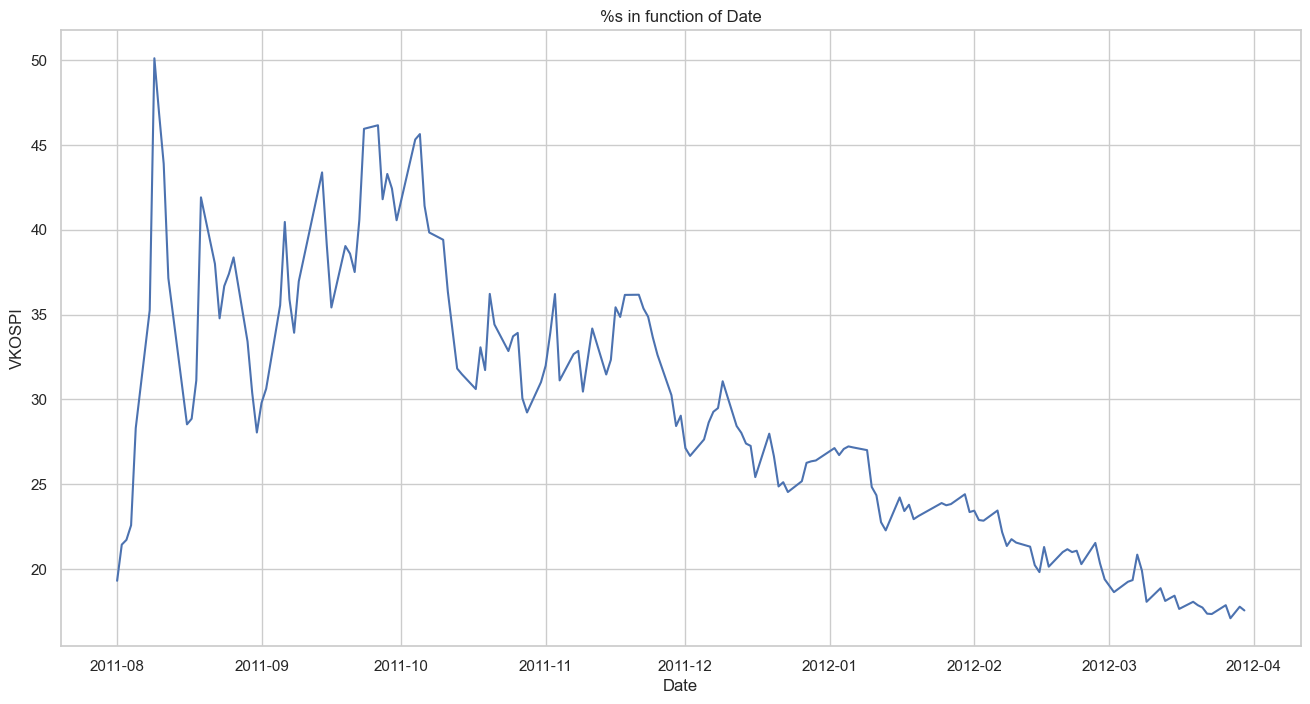

In [36]:
start_date = "2011-08-01"
end_date = "2012-04-01"

# Filter the DataFrame for the specified date range
filtered_df = df.loc[start_date:end_date]

plot_time_series(filtered_df, "%Y-%m")

weights_grid = np.linspace(0.1, 0.9, 10)
score_result = []

df["Weight"] = 1.0
df.loc[start_date:end_date, "Weight"] = 0.5
predictors.append("Weight")

In [27]:
for model_name in list_models:
    train_predict(df[predictors], df["VKOSPI"], "Weight", model_name=model_name)

RandomForest - Weight : 4.8030 (+/- 1.8860)
LGBM - Weight : 5.8324 (+/- 1.6439)
LinearRegression - Weight : 4.4796 (+/- 2.0858)
Lasso - Weight : 5.0871 (+/- 2.1297)
Ridge - Weight : 4.5410 (+/- 2.0561)
ElasticNet - Weight : 5.0905 (+/- 2.1254)


c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.41218e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.81003e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.33692e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.90588e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True

On voit que les résultats sont considérablement amélioré


## Ajout de nouvelles variables : les indicateurs techniques

Nous ajoutons des informations qui ne sont pas immédiatement évidentes pour le modèle afin de les reconnaître. Nous supposons que cela pourrait contribuer à améliorer la performance des modèles. Pour différents horizons temporels (2, 5, 30, 60 jours, notés h), nous introduisons les nouvelles caractéristiques suivantes :

- KOSPI200_Returns_h : mesure le rendement de l'indice KOSPI200 entre un jour donné et celui qui se trouve à h jours d'intervalle.
- KOSPI200_Ratio_h : calcule le ratio entre la valeur de KOSPI200 d'un jour et celle de la même valeur h jours plus tôt.
- KOSPI200_Trend_h : mesure le nombre de jours durant lesquels le rendement de KOSPI200 a été positif au cours des h derniers jours.

Nous pensons qu'il est pertinent d'ajouter ces informations, car l'anticipation des investisseurs vis-à-vis du marché est souvent influencée, de manière psychologique et naturelle, par des éléments tels que la variation du prix d'un actif par rapport à une date antérieure, ou encore par l'évolution récente de cet actif. Cela a souvent plus d'impact que la simple valeur absolue du stock à un moment donné.


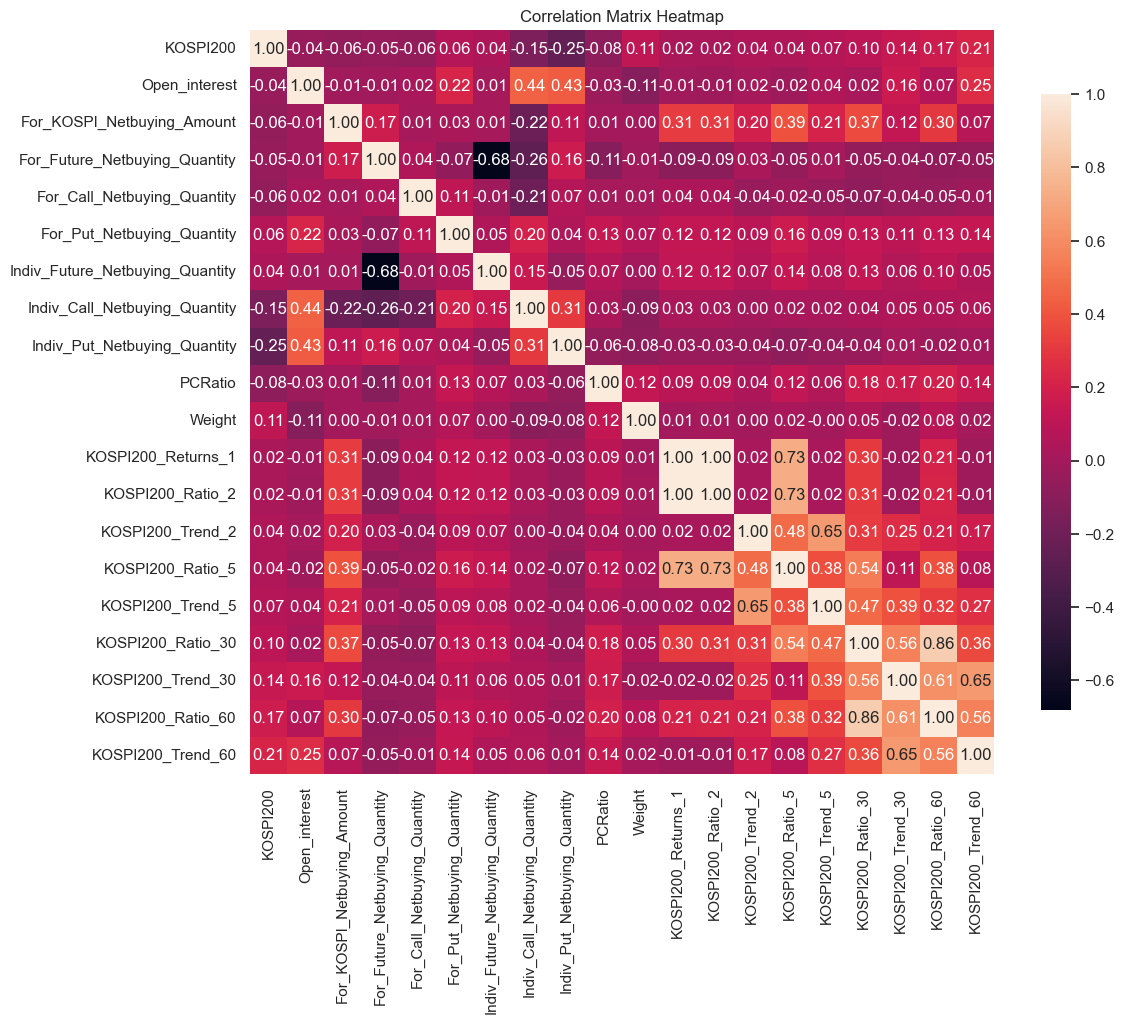

Highly correlated pairs (|correlation| > 0.9):
KOSPI200_Returns_1  KOSPI200_Ratio_2      0.999933
KOSPI200_Ratio_2    KOSPI200_Returns_1    0.999933
dtype: float64


In [ ]:
from numpy import nan as npNaN

horizon = [2, 5, 30, 60]
df["KOSPI200_Returns_1"] = (df["KOSPI200"] - df["KOSPI200"].shift(1)) / df[
    "KOSPI200"
].shift(1)
predictors.append("KOSPI200_Returns_1")


def count_positive_returns(returns):
    return (returns > 0).sum()


new_predictors = []
for h in horizon:
    rolling_mean = df["KOSPI200"].rolling(h).mean()
    ratio_column = f"KOSPI200_Ratio_{h}"
    df[ratio_column] = df["KOSPI200"] / rolling_mean
    predictors.append(ratio_column)

    trend_column = f"KOSPI200_Trend_{h}"
    df[trend_column] = (
        df["KOSPI200_Returns_1"]
        .shift(1)
        .rolling(h)
        .apply(count_positive_returns, raw=True)
    )
    predictors.append(trend_column)

    returns_columns = f"Returns_{h}"
    df[returns_columns] = (df["KOSPI200"] - df["KOSPI200"].shift(h)) / df[
        "KOSPI200"
    ].shift(h)

display_correlation_matrix()

Suite à la matrice, ous observons que les variables "KOSPI200_Ratio_5", "KOSPI200_Trend_5", "KOSPI200_Ratio_60", "KOSPI200_Trend_60", "KOSPI200_Ratio_30" et "KOSPI200_Ratio_2" sont fortement corrélées avec d'autres variables du modèle. En raison de cette forte corrélation, nous avons décidé de les supprimer.


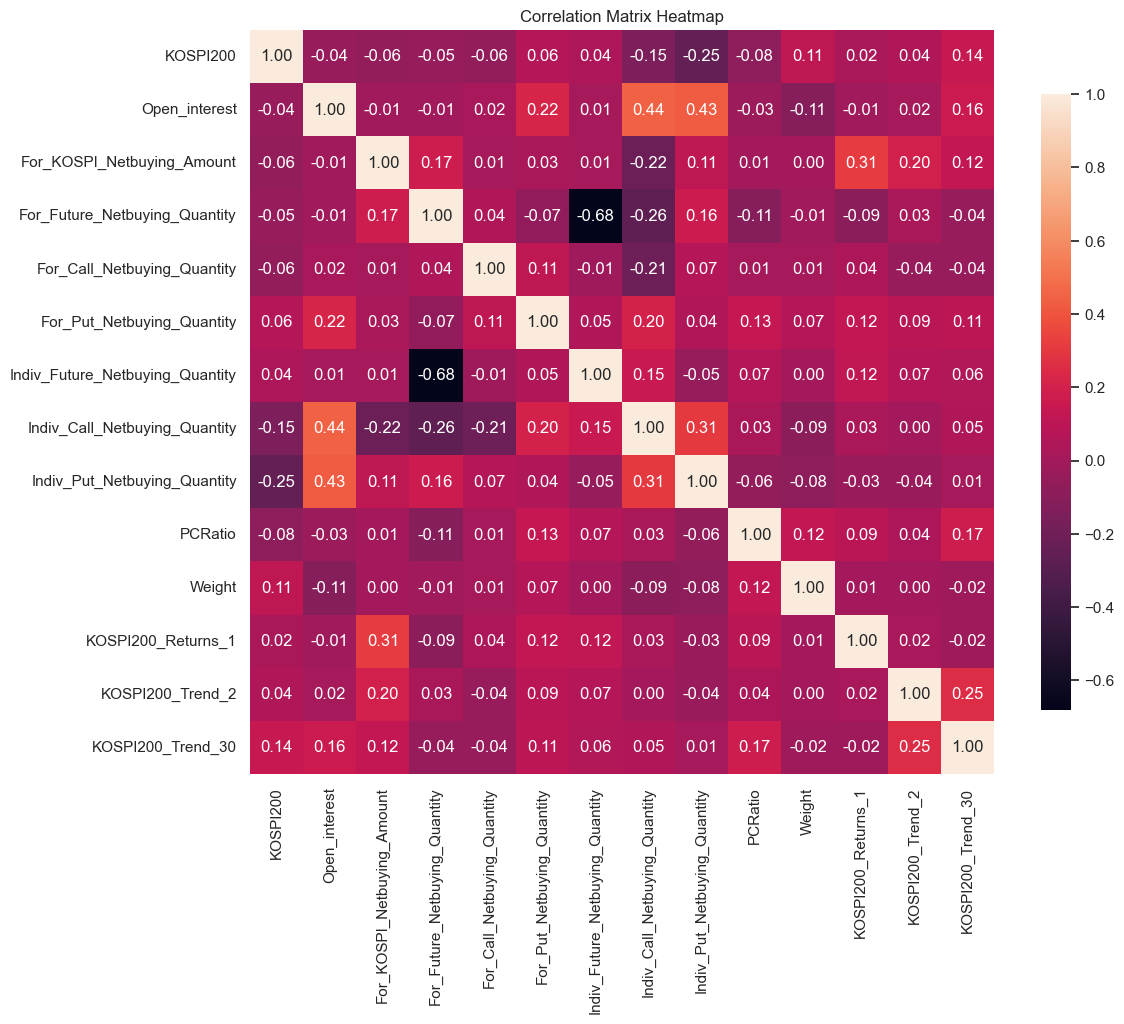

Highly correlated pairs (|correlation| > 0.9):
Series([], dtype: float64)


In [ ]:
df.drop(columns=["KOSPI200_Ratio_5"], inplace=True)
df.drop(columns=["KOSPI200_Trend_5"], inplace=True)
df.drop(columns=["KOSPI200_Ratio_60"], inplace=True)
df.drop(columns=["KOSPI200_Trend_60"], inplace=True)
df.drop(columns=["KOSPI200_Ratio_30"], inplace=True)
df.drop(columns=["KOSPI200_Ratio_2"], inplace=True)

predictors.remove("KOSPI200_Ratio_2")
predictors.remove("KOSPI200_Ratio_30")
predictors.remove("KOSPI200_Ratio_5")
predictors.remove("KOSPI200_Trend_5")
predictors.remove("KOSPI200_Ratio_60")
predictors.remove("KOSPI200_Trend_60")

display_correlation_matrix()

In [ ]:
for model_name in list_models:
    train_predict(
        df.dropna()[predictors], df["VKOSPI"], "Add columns", model_name=model_name
    )

RandomForest - Add columns : 5.5700 (+/- 1.4679)
LGBM - Add columns : 5.9630 (+/- 1.4567)
LinearRegression - Add columns : 4.8564 (+/- 1.8842)
Lasso - Add columns : 5.9805 (+/- 1.7144)
Ridge - Add columns : 4.9508 (+/- 1.8905)
ElasticNet - Add columns : 5.9803 (+/- 1.7133)


c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.33667e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.42925e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.96811e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.24929e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True

Cependant, contrairement à nos attentes, cette démarche n'a pas conduit à une amélioration des performances, mais a plutôt entraîné une diminution de celles-ci. Cela reste inexplicable à ce stade. Il est possible qu'il y ait un écart dans notre raisonnement que nous n'avons pas encore identifié.


### Ajoute de variable "Month" dans le dataset

Notre hypothèse est qu'au sein d'une année, certaines périodes peuvent être marquées par une activité de trading plus intense. Par exemple, cela pourrait être le cas en début d'année, lorsque les bilans d'entreprise viennent tout juste d'être publiés; pendant période de vacance et de l'été, les gens sont plus positives, ... C'est pourquoi nous avons décidé d'ajouter une variable catégorielle "Month" à notre dataset.


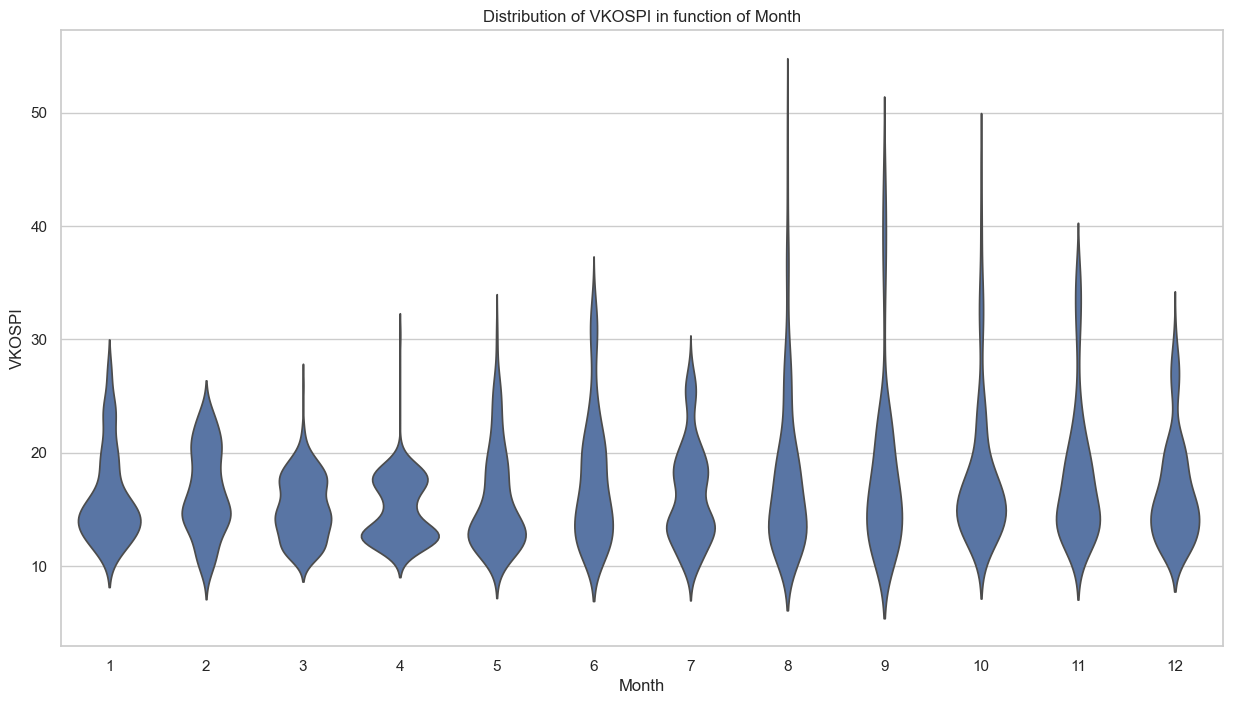

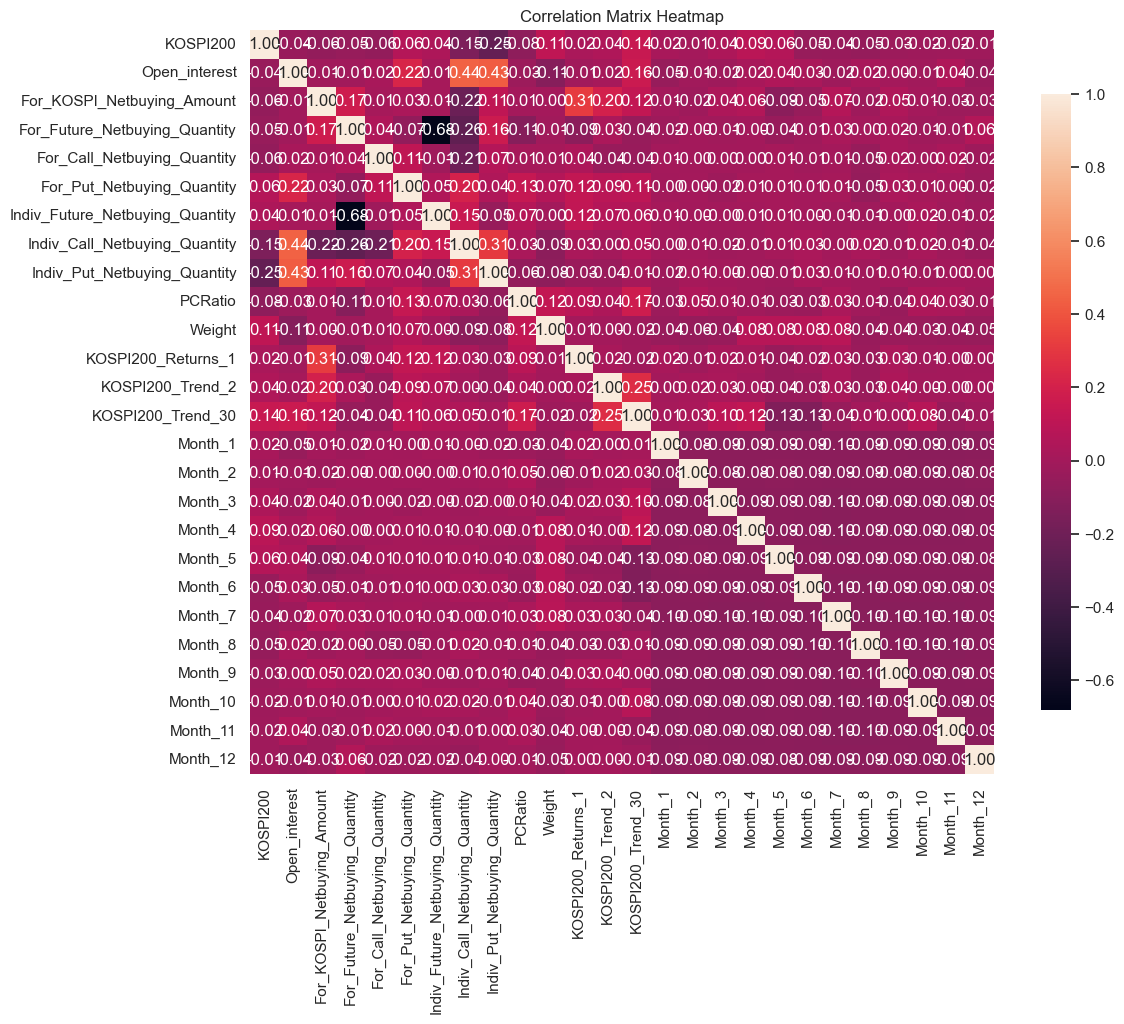

Highly correlated pairs (|correlation| > 0.9):
Series([], dtype: float64)


In [51]:
df["Month"] = pd.to_datetime(df.index, format="%d-%m-%Y").month
make_violin_plot("Month")

original_columns = df.columns.tolist()
df = pd.get_dummies(df, columns=["Month"])
added_columns = [col for col in df.columns.tolist() if col not in original_columns]
predictors = predictors + added_columns

display_correlation_matrix()

Nous observons que la distribution de "VKOSPI" varie en fonction des mois. Il semble qu'il existe une relation entre les mois et la variable "VKOSPI".


In [ ]:
for model_name in list_models:
    train_predict(
        df.dropna()[predictors], df["VKOSPI"], "Add months", model_name=model_name
    )

RandomForest - Add columns : 5.5464 (+/- 1.4936)
LGBM - Add columns : 5.9589 (+/- 1.4508)
LinearRegression - Add columns : 5.0703 (+/- 1.9758)
Lasso - Add columns : 5.9805 (+/- 1.7144)
Ridge - Add columns : 5.1289 (+/- 1.9192)
ElasticNet - Add columns : 5.9803 (+/- 1.7133)


c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.28508e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.24128e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.83709e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\binhm\Projects\Predict_VKOSPI\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.12075e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True

Une fois de plus, la performance n'a pas montré d'amélioration, contrairement à nos attentes. Il est possible encore une fois qu'il y ait un écart dans notre raisonnement que nous n'avons pas encore identifié.


### Reduction de dimensions

Parfois, la réduction de dimensions peut améliorer les performances des modèles en ne conservant que les informations essentielles et en réduisant les éléments superflus. Nous souhaitons tester si cette approche peut réellement contribuer à l'amélioration de notre modèle.


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.dropna()[predictors])

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Number of initial features:", X_scaled.shape[1])
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components:", pca.n_components_)

Number of initial features: 26
Explained variance ratio: [0.07760345 0.07111306 0.06482392 0.05151003 0.05091617 0.04566572
 0.04397654 0.0424507  0.04237983 0.04200047 0.04198177 0.04185666
 0.04172019 0.04122807 0.04021844 0.03927052 0.03763037 0.03655385
 0.03044694 0.02904604 0.02429012 0.02061076]
Number of components: 22


In [61]:
for model_name in list_models:
    train_predict(
        pd.DataFrame(X_pca),
        df["VKOSPI"],
        "Après reduction de dimension",
        model_name=model_name,
    )

RandomForest - Après reduction de dimension : 4.9942 (+/- 1.4889)
LGBM - Après reduction de dimension : 5.9447 (+/- 1.4663)
LinearRegression - Après reduction de dimension : 5.0338 (+/- 1.8796)
Lasso - Après reduction de dimension : 6.0169 (+/- 1.4564)
Ridge - Après reduction de dimension : 4.7974 (+/- 1.5046)
ElasticNet - Après reduction de dimension : 6.0169 (+/- 1.4564)


La technique de réduction de dimensions n'a pas conduit à une amélioration des performances des modèles.


# Conclusion

- Meilleures performances possible obtenu
- Les traiements ont du sens
